## Visualization for Dask Expiriment Data
https://arxiv.org/pdf/1711.00489.pdf

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/joeholt/Developer/next-lab/adadamp-experiments/exp-dask'

In [43]:
def build_times(times):
    new_times = [0 for _ in range(len(times))]
    new_times[0] = times[0]
    for i in range(1, len(times)):
        new_times[i] = times[i] + new_times[i - 1]
    return new_times

In [78]:
def plot_time_vs(stats, field2, y_label):
    # get data
    stats = list(stats.T.to_dict().values())
    time_for_epoch = lambda stat: stat['partial_fit__time'] + stat['score__time']
    times = [time_for_epoch(stat) for stat in stats]
    times = build_times(times)
    accs = [stat[field2] for stat in stats]
    assert len(times) == len(accs)
    
    # plot data
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(times, accs)
    ax.set_xlabel('Training Time (s)')
    ax.set_ylabel(y_label)
    ax.grid()
    return ax

In [84]:
dec_lr_file = './sim-results/dec-lr/results-ep60.csv'
decreasing_lr_stats = pd.read_csv(dec_lr_file)

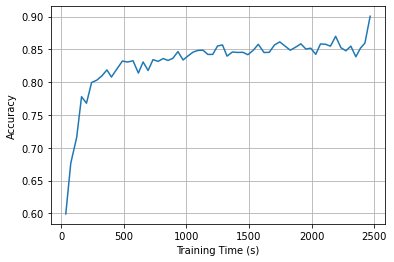

In [85]:
ax = plot_time_vs(decreasing_lr_stats, 'score__acc', 'Accuracy')

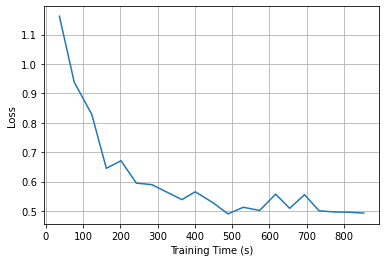

In [82]:
ax = plot_time_vs(decreasing_lr_stats, 'score__loss', 'Loss')